# Exploring the interactive widgets of ipython
Learn how to play with them.

In [1]:
from IPython.html.widgets import interact, interactive, fixed
import IPython.html.widgets as widgets
import numpy as np
import matplotlib.pyplot as plt

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
x = np.linspace(0, 1, 100)
f = 2

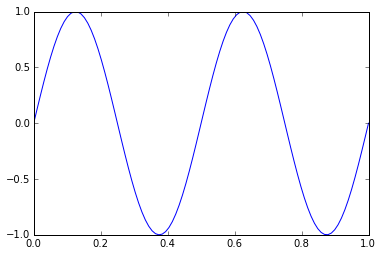

In [5]:
%matplotlib inline
plt.plot(x, np.sin(2 * np.pi * x * f))

In [8]:
def pltsin(f):
    plt.plot(x, np.sin(2 * np.pi * x * f))

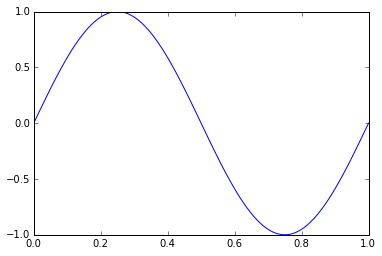

In [9]:
interact(pltsin, f=(1, 10, 0.1))

In [10]:
def pltsin(f, a):
    plt.plot(x, a * np.sin(2 * np.pi * x * f))

<function __main__.pltsin>

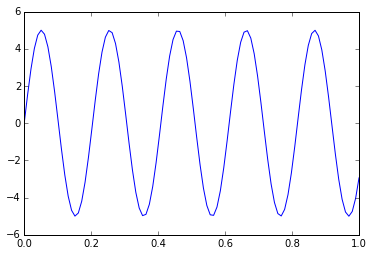

In [12]:
interact(pltsin, f=(1,10,0.1), a=(1,10,1))

In [13]:
def f(x):
    print(x)

In [14]:
interact(f, x=10)

24


In [15]:
interact(f, x='Hi there')

Hi there


<function __main__.f>

### The interact option is in fact any widget and x is only an abreviation

In [20]:
interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10))

17


In [21]:
interact(f, x={'one': 10, 'two': 20})

20


### Interactive

In [23]:
def f(a, b):
    return a + b

In [25]:
w = interactive(f, a=10, b=20)

In [28]:
type(w)  # This is in fact a box

ipywidgets.widgets.widget_box.Box

In [27]:
w.children  

(<ipywidgets.widgets.widget_int.IntSlider at 0x7fbc0df14cc0>,
 <ipywidgets.widgets.widget_int.IntSlider at 0x7fbc0df14e48>)

In [29]:
from IPython.display import display

In [30]:
display(w)

52